In [1]:
from freedom import freedom
from data import data
from analyze import analyze
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as ply
import geopandas as geo
import pandas as pd
import numpy as np

In [14]:
analyze(data, 2017)

,GDP per capita (current US$),"Agriculture, forestry, and fishing, value added (% of GDP)",Food production index (2004-2006 = 100),Arable land (hectares per person),Surface area (sq. km),Rural population (% of total population),Access to electricity (% of population),CO2 emissions (metric tons per capita),Urban population,"Population, total",...,Lending interest rate (%),Real interest rate (%),"Stocks traded, total value (% of GDP)","Listed domestic companies, total",Domestic credit to private sector (% of GDP),Bank capital to assets ratio (%),"Official exchange rate (LCU per US$, period average)",Time required to start a business (days),New businesses registered (number),Total tax rate (% of commercial profits)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,652860.0,74.750,NaN,NaN,8971345.0,35530081.0,...,NaN,NaN,NaN,NaN,3.474263,11.554978,68.026904,7.5,NaN,71.4
Albania,NaN,18.961950,NaN,NaN,28750.0,40.617,NaN,NaN,1706345.0,2873457.0,...,NaN,NaN,NaN,NaN,35.003810,10.167439,119.099667,5.0,NaN,37.3
Algeria,NaN,12.264896,NaN,NaN,2381740.0,27.948,NaN,NaN,29770548.0,41318142.0,...,8.000000,1.123428,NaN,NaN,24.363741,NaN,110.973017,20.0,NaN,65.6
American Samoa,NaN,NaN,NaN,NaN,200.0,12.830,NaN,NaN,48502.0,55641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,470.0,11.850,NaN,NaN,67845.0,76965.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,1246700.0,35.161,NaN,NaN,19311773.0,29784193.0,...,15.815684,-11.683023,NaN,NaN,15.789916,NaN,165.915951,36.0,NaN,49.1
Antigua and Barbuda,NaN,1.630647,NaN,NaN,440.0,75.287,NaN,NaN,25210.0,102012.0,...,9.310000,7.631749,NaN,NaN,44.297566,NaN,2.700000,22.0,NaN,41.9
Argentina,NaN,5.607975,NaN,NaN,2780400.0,8.251,NaN,NaN,40618237.0,44271041.0,...,31.240000,4.699532,1.034015,96.0,16.112258,12.281262,16.562707,24.0,NaN,106.0
Armenia,NaN,14.937978,NaN,NaN,29740.0,36.897,NaN,NaN,1849202.0,2930450.0,...,14.406002,11.908686,NaN,NaN,51.501786,15.707337,482.716394,4.5,NaN,18.5


In [6]:
analyze(data, "GDP per capita (current US$)")

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5.977733e+01,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322000,129.506654,129.798541,...,373.361116,445.893298,553.300289,603.537023,669.009051,638.612543,629.345250,569.577923,561.778746,585.850064
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3952.830781,4131.872341,4537.862492
Algeria,2.448248e+02,213.485905,171.209809,225.530596,236.610190,248.378144,234.188908,252.418252,280.268288,300.981826,...,4905.254866,3868.831230,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778,4160.220067,3916.881571,4123.389937
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9871.997194,12058.263823,10352.822762,10375.994215,11660.329531,11589.853002,11598.751736,11865.963232,11834.745229,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,37231.815671,39146.548836
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.579014,3347.844900,3531.416878,4299.008136,4539.467689,4804.633826,4707.578098,3683.552607,3308.772828,4170.312280
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14797.368423,13082.281660,12174.697859,11931.204107,12517.557929,12194.608761,12946.986936,13659.147914,14462.176279,15021.738183
Argentina,NaN,NaN,1148.579957,845.077184,1166.317400,1272.010496,1266.344989,1057.755661,1136.517832,1324.082935,...,8953.359275,8161.306966,10276.260498,12726.908359,12969.707124,12976.636425,12245.256449,13698.293438,12654.354999,14401.974855
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4010.026997,2993.832531,3218.381655,3526.978143,3684.804810,3843.591213,3994.712355,3617.935746,3605.743117,3936.798320


In [ ]:
df2 = freedom[[2017]].drop('Korea, Rep.', 0)

In [ ]:
df1 = np.log10(df2.join(analyze(data, 2017,["GDP per capita (current US$)"])))
df1.columns = ['x', 'y']
df1.plot('x', 'y', kind='scatter')
plt.show()

In [7]:
def mmm(x=3,age=2017, ind="GDP per capita (current US$)"):
    df1 = analyze(data, age, [ind]).sort_values([ind])
    lmd1 = int(len(df1)/2)-int(x/2)
    df1.iloc[list(range(0,x))+list(range(lmd1, lmd1+x))+list(range(-x,0))].plot(kind="bar")
    plt.show()

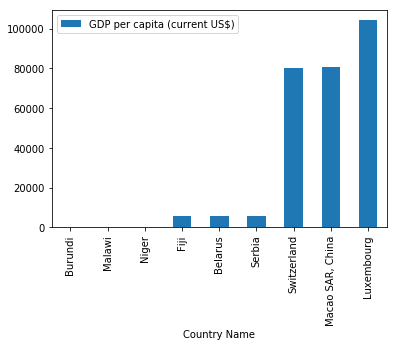

In [9]:
mmm()

In [10]:
pd.DataFrame?

In [ ]:
x = 2
df1 = freedom[[2017]].drop('Korea, Rep.', 0).dropna().sort_values([2017])
lmd1 = int(len(df1)/2)
df1.iloc[list(range(0,x))+list(range(lmd1-int(x/2), lmd1+1+int(x/2)))+list(range(-x,0))].plot(kind="bar")
plt.show()

In [ ]:
df1 = analyze(data, 2017, ["GDP per capita (current US$)"])
df1.groupby(["GDP per capita (current US$)", pd.cut(df1.distances, 2)]).value.mean()



In [12]:
def analyze(data, ageorcountryorind, indice=False, rm=True, log=False, disp=False):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import linear_model
    countries = [i.replace("\n", "") for i in open("countries.txt")]
    
    if type(ageorcountryorind) == int:
        country = pd.DataFrame(data[0][str(ageorcountryorind)], columns=[data[0]['Indicator Name'][0]])
        for k,i in enumerate(data[1:]):
            country = country.join(pd.Series(i[str(ageorcountryorind)], name=data[k+1]["Indicator Name"][0]), how="outer")
        df = country.reindex(countries) if rm else country
    
    elif ageorcountryorind[0:2] == "c-":
        ages = pd.DataFrame(data[0].T[ageorcountryorind[2:]][4:], columns=[data[0]["Indicator Name"][0]])
        for k,i in enumerate(data[1:]):
            ages = ages.join(pd.Series(i.T[ageorcountryorind[2:]][4:], name=data[k+1]["Indicator Name"][0]), how="outer")
        df = ages
        
    else:
        for i in data:
            if i['Indicator Name'][0] == ageorcountryorind:
                saida = i.drop("Indicator Name", axis=1)
                break
        df = saida.reindex(countries) if rm else saida

    if indice==False:
        return df.dropna(how='all')
    elif log:
        df = np.log(df[indice].dropna()) 
        if disp:
            y = np.array(df[indice[0]]).reshape(-1, 1)
            x = np.array(df[indice[1]]).reshape(-1, 1)
            model = linear_model.LinearRegression().fit(x, y)
            plt.plot(x, model.predict(x), color='red', linewidth=2.)
            plt.scatter(y=y, x=x, color='blue', s=50, alpha=.5)
            plt.title('Reta ajustada log-log')
            plt.xlabel(indice[0])
            plt.ylabel(indice[1])
            plt.show()
        else:
            return df
    else:
        df = df[indice].dropna()
        if disp:
            y = df[indice[0]]
            x = df[indice[1]]
            plt.scatter(y=y, x=x, color='blue', s=50, alpha=.5)
            plt.title('Gráfico de dispersao')
            plt.xlabel(indice[0])
            plt.ylabel(indice[1])
            plt.show()
        else:
            return df
        